<a href="https://colab.research.google.com/github/comb0601/keraspp/blob/master/deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install mtcnn

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [10]:
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

ModuleNotFoundError: ignored

In [11]:

# Create face detector
mtcnn = MTCNN(select_largest=False, post_process=False)

# Load a single image and display
v_cap = cv2.VideoCapture('/content/aagfhgtpmv.mp4')
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

# Detect face
face = mtcnn(frame)

face
# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');

NameError: ignored

In [66]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [77]:
image = cv2.imread('/content/sample_data/0000.png')


In [78]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #RGB 형태로 변환
print(image.shape)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #HSV 형태로 변환
print(image2.shape)

(375, 376, 3)
(375, 376, 3)


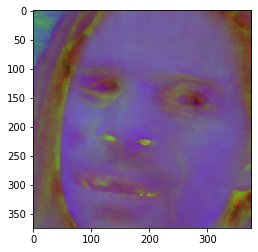

In [79]:

#plt.imshow(image) #424000,3
plt.imshow(image2)#141000, 3, 3

In [80]:
#image = image.reshape((image.shape[0] * image.shape[1], 3))
image2 = image2.reshape((image2.shape[0] * image2.shape[1], 3))
print(image2.shape)
k = 1 
clt = KMeans(n_clusters = k)
clt.fit(image2)


(141000, 3)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
for center in clt.cluster_centers_:
    print(center)

[111.08021986  83.34535461 125.56824823]


In [82]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


hist = centroid_histogram(clt)
print(hist)

[1.]


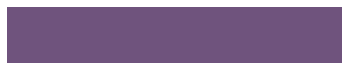

In [83]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

bar = plot_colors(hist, clt.cluster_centers_)


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()